#### Сборный проект. Изучение закономерностей, определяющих успешность игр

****Описание проекта****



Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv( '/datasets/games.csv')
data = data.copy()
display(data)

In [2]:
data.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],axis='columns',inplace=True)


In [3]:
data.duplicated().sum()

0

Проверим,есть лм пропуски или дупликаты.

In [4]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [5]:
data.duplicated().sum()

0

Поработаем с пропусками. Изменим типы данных - нам нужно привести critic_score к целочисленному типу данных. Заполним пропуски в critic_score на 0(тк 0 может означать и отсутствие рейтинга) и user_score на условный маркер. Однако с столбце 'user_score' втречаются значения tbd,оно означает "to be determined",такое обозначение нормально для комп.игр, так как требуется время, чтобы игру пценили пользователи. Причины пропусков могут быть случайные( как в столбцах Name и Genre), так и неслучайные( например, в Critic score агенства могли не поставить оценку или не успели ). Сначала нам надо заменить tbd на Nan. Пропуски в столбце Rating заменим на No. Заполним пропуски в столбце genre на 'No'. Теперь нам надо привести столбец user_score к типу float.Создадим столбец all_sale с продажами по всему миру.

In [6]:
data['user_score']=data['user_score'].replace('tbd', 'NaN')

In [7]:
data['critic_score']=data['critic_score'].fillna(value=0)

data['user_score']=data['user_score'].fillna(value=11)

Сначала пробуем заполнить пропуски в годе релиза из дупликатов игр. Для удобства заменим пропуск year_of_realease на 1979

In [8]:
data['year_of_release'].isnull().sum()

269

In [9]:
no_year = data[data['year_of_release'].isnull()==True]['name'].index

for i in no_year:
    x_name = data.loc[i, 'name'] 
    data['year_of_release'][i] = data.query('name ==@x_name and year_of_release !="NaN"')['year_of_release'].max()


/tmp/ipykernel_79/3306329751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'][i] = data.query('name ==@x_name and year_of_release !="NaN"')['year_of_release'].max()


In [10]:
print('Пропущенных значений после обработки:' , data['year_of_release'].isnull().sum())

Пропущенных значений после обработки: 146


In [11]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [12]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)

In [13]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)

In [14]:
data['genre'] = data['genre'].fillna('No')
data.dropna(subset=['name'],inplace=True)

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float', errors ='coerce')

In [16]:
data['user_score'].unique()

array([ 8. , 11. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  nan,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7],
      dtype=float32)

In [17]:
data.drop(data[data['user_score'].isna()].index,inplace=True)

In [18]:
data['user_score'].dropna()

0         8.0
1        11.0
2         8.3
3         8.0
4        11.0
         ... 
16710    11.0
16711    11.0
16712    11.0
16713    11.0
16714    11.0
Name: user_score, Length: 14173, dtype: float32

In [19]:
data['user_score']=data['user_score'].replace('nan', 'NaN')

<AxesSubplot:>

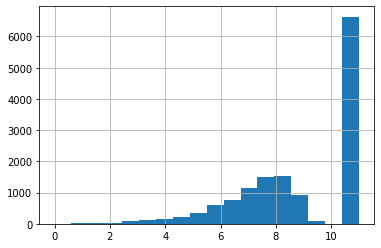

In [20]:
data['user_score'].hist(bins=18)

In [21]:
data['name'].duplicated().sum()#Странно,что в назв.есть дупликаты. Посмотрим.


4078

In [22]:
data['platform'].duplicated().sum()

14142

In [102]:
data[data.duplicated(subset = ['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
4127,Sonic the Hedgehog,PS3,2006,Platform,0.0,0.48,0.0,0.0,43,4.1,E10+,0.48
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


In [140]:
data[data.duplicated(subset = ['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0,11.0,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,11.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,11.0,NaN,0.01


In [141]:
data[data.duplicated(subset = ['platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,11.0,NaN,30.26
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,11.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,11.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,11.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,11.0,NaN,0.01


In [142]:
data[data.duplicated(subset = ['year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,11.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,11.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,11.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,11.0,NaN,0.01


In [24]:
data['name'].duplicated().sum()#

4078

In [25]:
data['platform'].duplicated().sum()

14142

In [26]:
data['all_sale']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [27]:
data['year_of_release'].value_counts()

2008    1110
2009    1026
2007    1009
2010     938
2011     935
2006     893
2005     825
2003     689
2004     658
2002     650
2012     636
2015     568
2014     561
2013     532
2016     468
2001     402
1998     379
1999     331
2000     307
1997     288
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:>

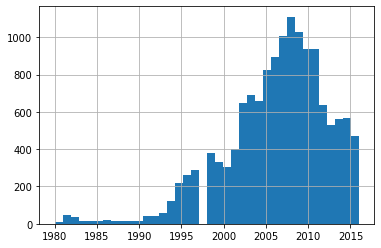

In [103]:
data['year_of_release'].hist(bins=38)

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sale'],
      dtype='object')

Посмотрим на распределение платформ с 2000 г

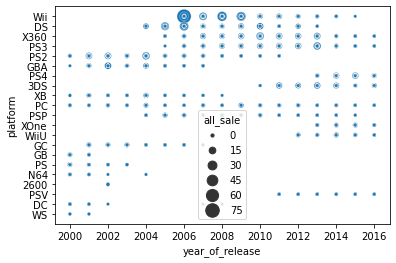

In [30]:
a=data[data['year_of_release'] >= 2000]
sns.scatterplot(x="year_of_release", y="platform"\
                ,size="all_sale"\
                ,data=a\
                ,sizes=(10, 200));

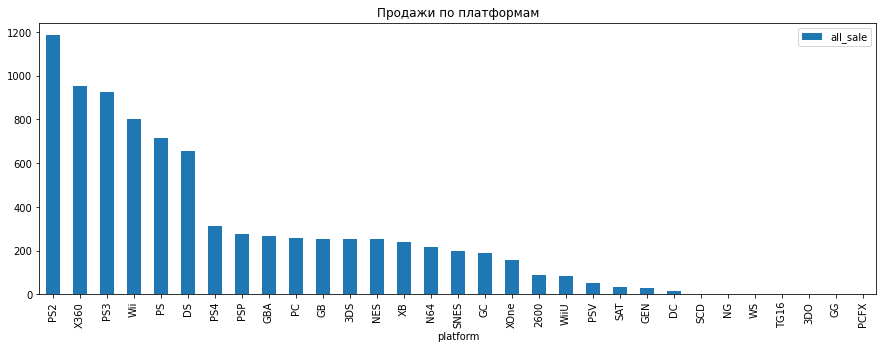

In [31]:
data.pivot_table(index='platform', values='all_sale', aggfunc='sum').sort_values('all_sale',ascending=False).plot(y='all_sale', kind='bar',figsize=(15,5),title='Продажи по платформам')

plt.show()

Популярные по продажам были PS2, X360, Wii, PS3, DS, PS. 

Создадим таблицу с популярными платформами с 2000 г

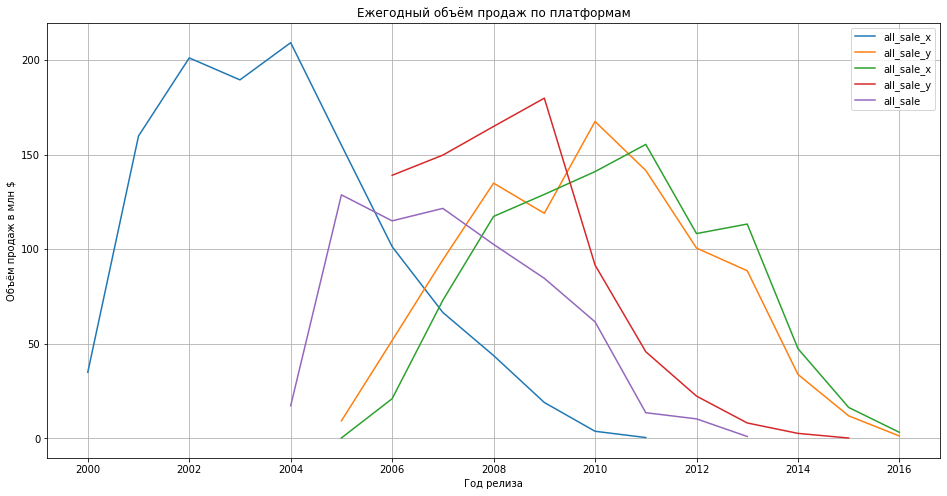

In [32]:
PS2 = data.query('platform =="PS2"').pivot_table(index='year_of_release', values='all_sale', aggfunc='sum')
X360 = data.query('platform =="X360"').pivot_table(index='year_of_release', values='all_sale', aggfunc='sum')
PS3 = data.query('platform =="PS3"').pivot_table(index='year_of_release', values='all_sale', aggfunc='sum')
Wii = data.query('platform =="Wii"').pivot_table(index='year_of_release', values='all_sale', aggfunc='sum')
DS = data.query('platform =="DS"').pivot_table(index='year_of_release', values='all_sale', aggfunc='sum')
pp = (
    PS2.merge(X360, how='outer', on='year_of_release')
    .merge(PS3, how='outer', on='year_of_release')
    .merge(Wii, how='outer', on='year_of_release')
    .merge(DS, how='outer', on='year_of_release'))
pp = pp.query('year_of_release >= 2000')
pp.plot(figsize=(16, 8), title='Ежегодный объём продаж по платформам', grid=True).set(xlabel='Год релиза', ylabel='Объём продаж в млн $')
plt.show()

In [33]:
pp

,all_sale_x,all_sale_y,all_sale_x,all_sale_y,all_sale
year_of_release,,,,,
2000,34.91,NaN,NaN,NaN,NaN
2001,159.77,NaN,NaN,NaN,NaN
2002,201.05,NaN,NaN,NaN,NaN
2003,189.45,NaN,NaN,NaN,NaN
2004,209.10,NaN,NaN,NaN,17.23
2005,154.96,9.22,0.19,NaN,128.68
2006,101.31,51.72,20.94,139.01,114.93
2007,66.50,94.37,72.99,149.69,121.52
2008,43.74,134.88,117.28,164.84,102.49


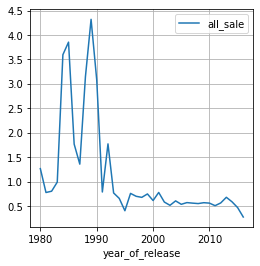

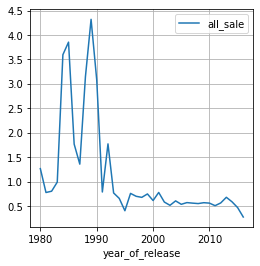

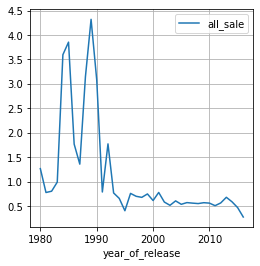

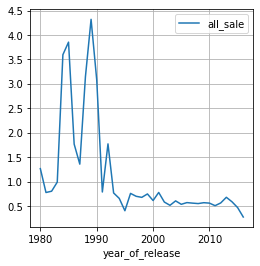

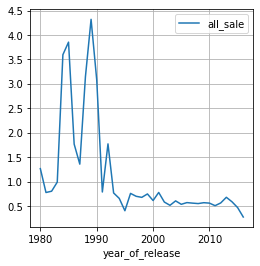

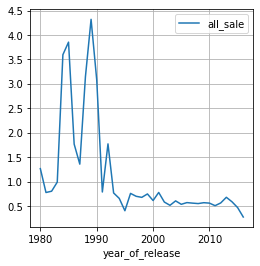

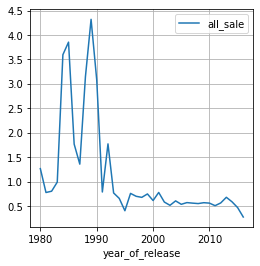

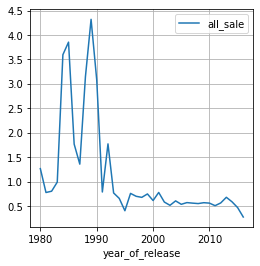

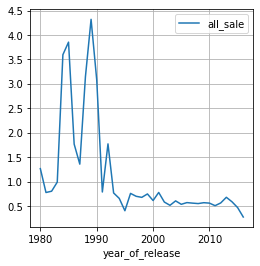

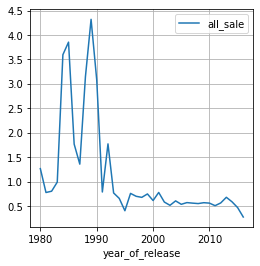

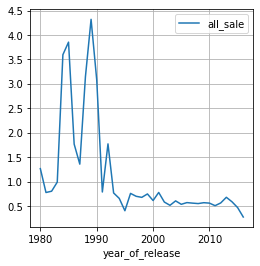

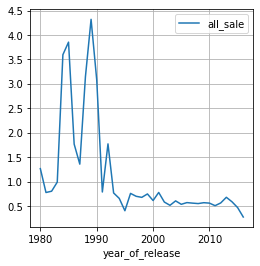

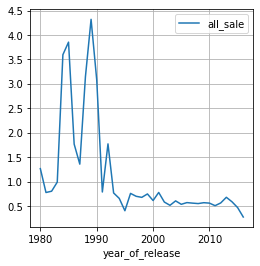

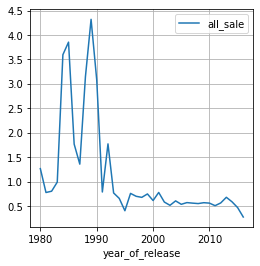

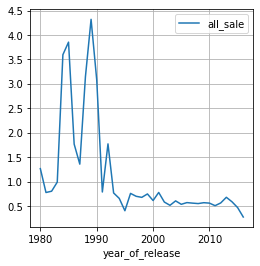

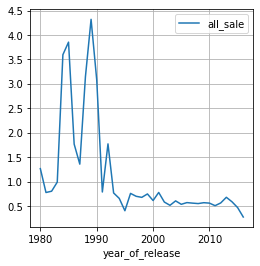

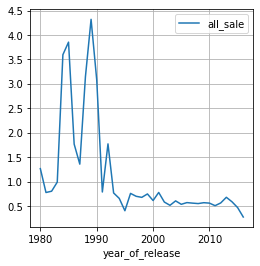

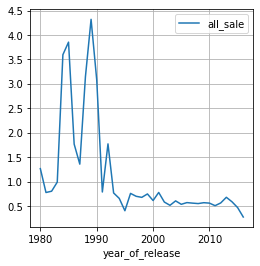

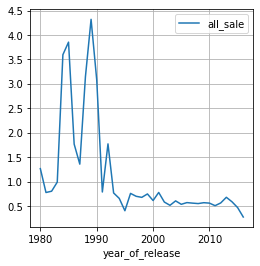

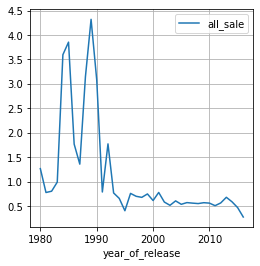

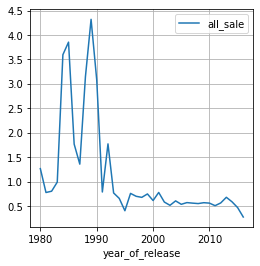

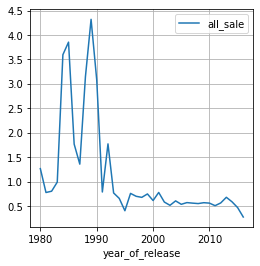

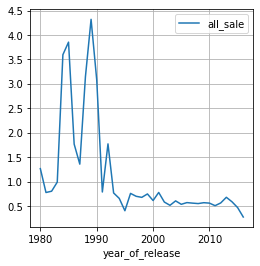

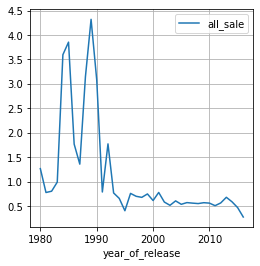

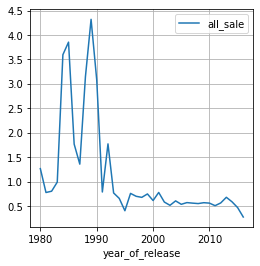

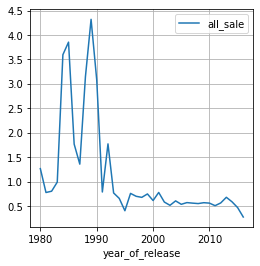

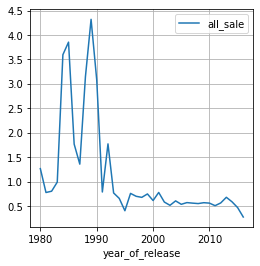

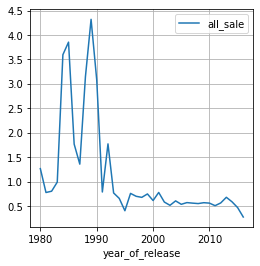

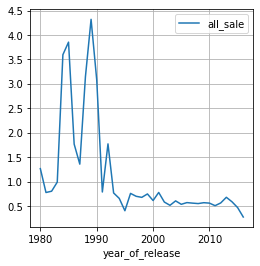

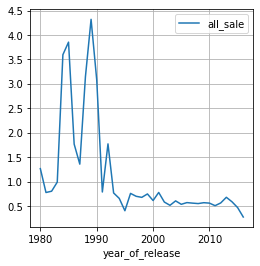

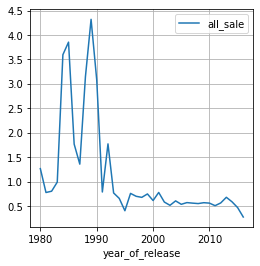

In [34]:
for x in data['platform'].unique():
    
    (
        data.pivot_table(index='year_of_release', values='all_sale')
        .plot(grid=True, style='-', figsize=(4, 4))
    )
    plt.show()


Итак, как мы видим, многие платформы устарели. В среднем, срок жизни платформы 8,9 лет. Посмотрим данные за 2015-2016 года.


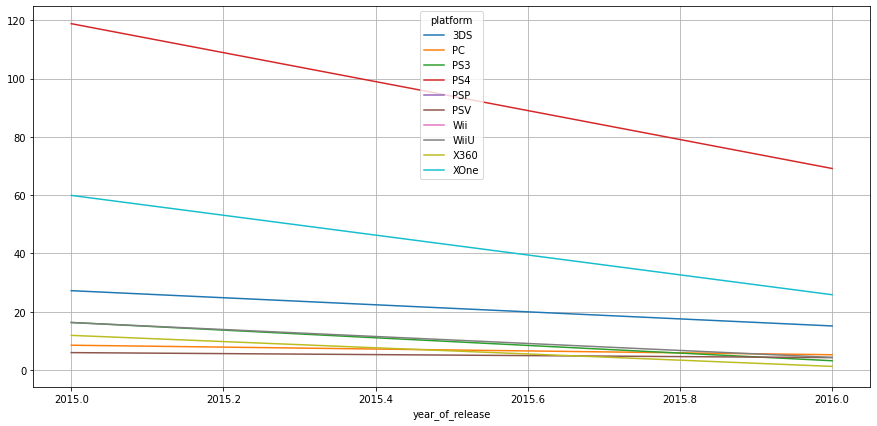

In [35]:
dataf = data.query("2015 <= year_of_release <= 2016")

dataf.pivot_table(index='year_of_release', columns = 'platform', values='all_sale', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Создадим таблицу с актуальными данными.

In [36]:
actual_data= data.query('year_of_release > 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2129 non-null   object 
 1   platform         2129 non-null   object 
 2   year_of_release  2129 non-null   int64  
 3   genre            2129 non-null   object 
 4   na_sales         2129 non-null   float64
 5   eu_sales         2129 non-null   float64
 6   jp_sales         2129 non-null   float64
 7   other_sales      2129 non-null   float64
 8   critic_score     2129 non-null   int64  
 9   user_score       2129 non-null   float32
 10  rating           1164 non-null   object 
 11  all_sale         2129 non-null   float64
dtypes: float32(1), float64(5), int64(2), object(4)
memory usage: 207.9+ KB


In [37]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,11.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,11.0,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


Создадим таблицу с выручкой по платформам за актульный период.

In [38]:
best_sales_platform = pd.pivot_table(actual_data, index=['platform','year_of_release'], 
                                     values='all_sale', aggfunc = 'sum')
best_sales_platform.sort_values('all_sale', ascending=False)


,,all_sale
platform,year_of_release,
PS4,2015,118.86
PS3,2013,113.24
PS4,2014,100.00
X360,2013,88.57
PS4,2016,69.15
XOne,2015,59.92
3DS,2013,56.32
XOne,2014,54.07
PS3,2014,47.40


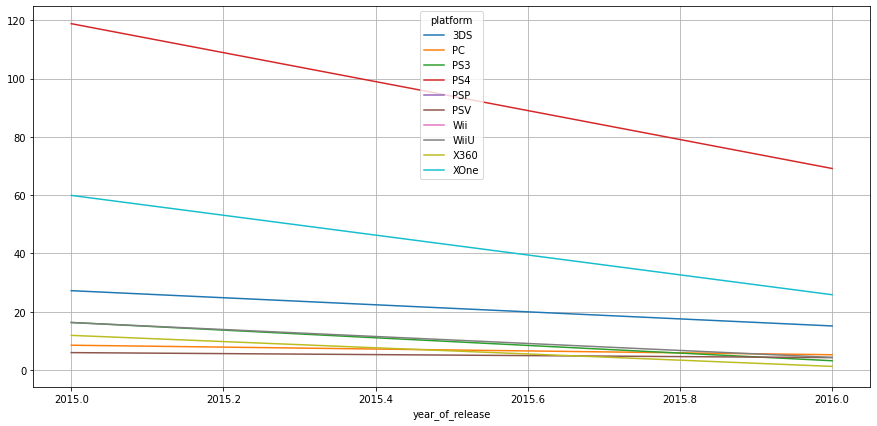

In [109]:
dataf.pivot_table(index='year_of_release', columns = 'platform', values='all_sale', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Итак, лучшими платформами за актуальный период оказались PS3, X360, PS4, 3DSб XOne. 

In [108]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,11.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,11.0,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


count    2129.000000
mean        0.508436
std         1.261198
min         0.010000
25%         0.040000
50%         0.120000
75%         0.420000
max        21.050000
Name: all_sale, dtype: float64

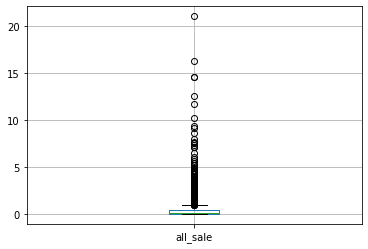

In [41]:
actual_data.boxplot(column = 'all_sale')
actual_data['all_sale'].describe()

count    322.000000
mean       0.559317
std        1.497406
min        0.010000
25%        0.050000
50%        0.180000
75%        0.550000
max       21.050000
Name: all_sale, dtype: float64

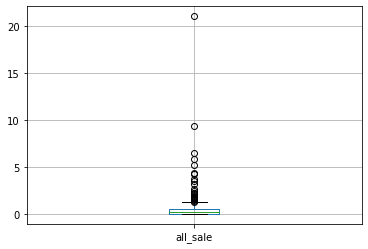

In [42]:
PS3_actual_data= actual_data.query('platform =="PS3"')
PS3_actual_data.boxplot(column = 'all_sale')
PS3_actual_data['all_sale'].describe()

count    386.000000
mean       0.813472
std        1.618992
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: all_sale, dtype: float64

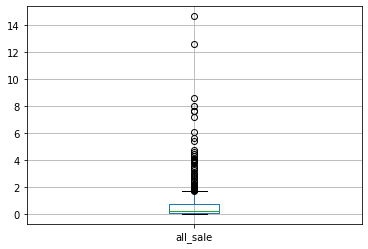

In [43]:
PS4_actual_data = actual_data.query('platform =="PS4"')
PS4_actual_data.boxplot(column = 'all_sale')
PS4_actual_data['all_sale'].describe()

count    236.000000
mean       0.672754
std        1.051848
min        0.010000
25%        0.067500
50%        0.240000
75%        0.750000
max        7.390000
Name: all_sale, dtype: float64

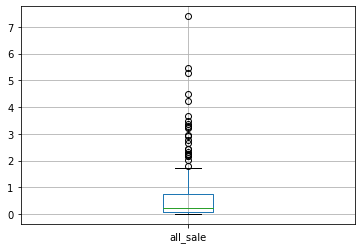

In [44]:
XOne_actual_data= actual_data.query('platform =="XOne"')
XOne_actual_data.boxplot(column = 'all_sale')
XOne_actual_data['all_sale'].describe()

count    176.000000
mean       0.769489
std        1.702728
min        0.010000
25%        0.090000
50%        0.285000
75%        0.875000
max       16.270000
Name: all_sale, dtype: float64

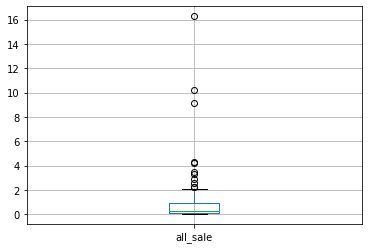

In [45]:
X360_actual_data= actual_data.query('platform =="X360"')
X360_actual_data.boxplot(column = 'all_sale')
X360_actual_data['all_sale'].describe()

count    278.000000
mean       0.509712
std        1.436457
min        0.010000
25%        0.040000
50%        0.100000
75%        0.310000
max       14.600000
Name: all_sale, dtype: float64

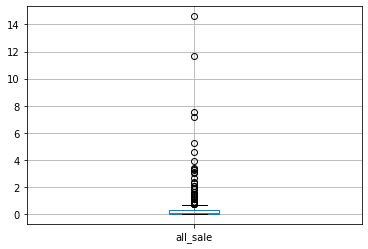

In [46]:
_3DS_actual_data = actual_data.query('platform =="3DS"')
_3DS_actual_data.boxplot(column = 'all_sale')
_3DS_actual_data['all_sale'].describe()

In [112]:
#bestgame= data.query('year_of_release == 2016').sort_values(by='all_sale', ascending=False).reset_index(drop=True).head(15)
            
#name_game = list(bestgame['name'].values)
#platf_2016= list(bestgame['platform'].values)
games_2016 = actual_data.sort_values(by='all_sale', ascending=False).reset_index(drop=True)
                   

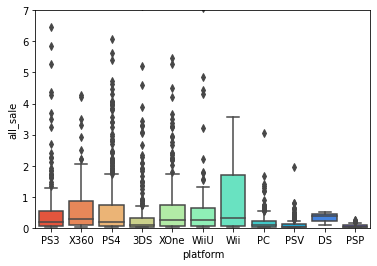

In [113]:
ax = sns.boxplot(x="platform", y="all_sale", data=games_2016, palette='rainbow_r')
ax.set_ylim(0, 7)
plt.show()

Итак, у платформы PS4 средняя выручка составила 800 тыс., у XOne - 640 тыс., у X360 - 730 , у 3DS- 472. У платформы PS4 медиана выше всех, у XOne- чуть ниже, далее у PS3, PC и X360. Самые большие выбросы у  платформы PS4. Стандартное отклнение у PS4 - 1.6, у XOne - 0.3, у X360 - 1.66.

Видно, что продажи различаются по платформам. У платформ медиана находится на разном уровне. Среднее по платформам 434 тысячи, максимальные - 17 млн.

Посмотрим корреляцию внутри одной платформы и сравним с другой.

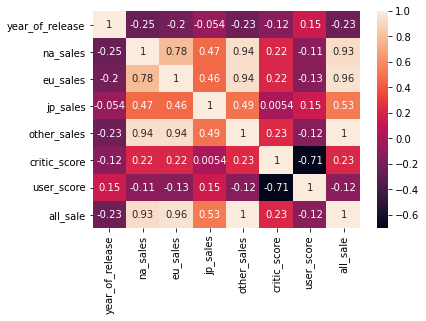

In [49]:
correlyatsia = data[(data['platform'] == 'PS4')].corr()
sns.heatmap(correlyatsia, annot=True);

Посмотрим корреляцию между продажами и отзывами отдельно.

In [50]:
PS4_salesratings = PS4_actual_data.loc[:,['all_sale', 'critic_score', 'user_score']]
PS4_salesratings.head()

,all_sale,critic_score,user_score
31,14.63,0,11.0
42,12.62,97,8.3
77,8.58,82,4.3
87,7.98,0,11.0
92,7.66,83,5.7


In [51]:

PS4_salesratings.corr()

,all_sale,critic_score,user_score
all_sale,1.000000,0.225314,-0.118139
critic_score,0.225314,1.000000,-0.705394
user_score,-0.118139,-0.705394,1.000000


array([[<AxesSubplot:xlabel='all_sale', ylabel='all_sale'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sale'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sale'>],
       [<AxesSubplot:xlabel='all_sale', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sale', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

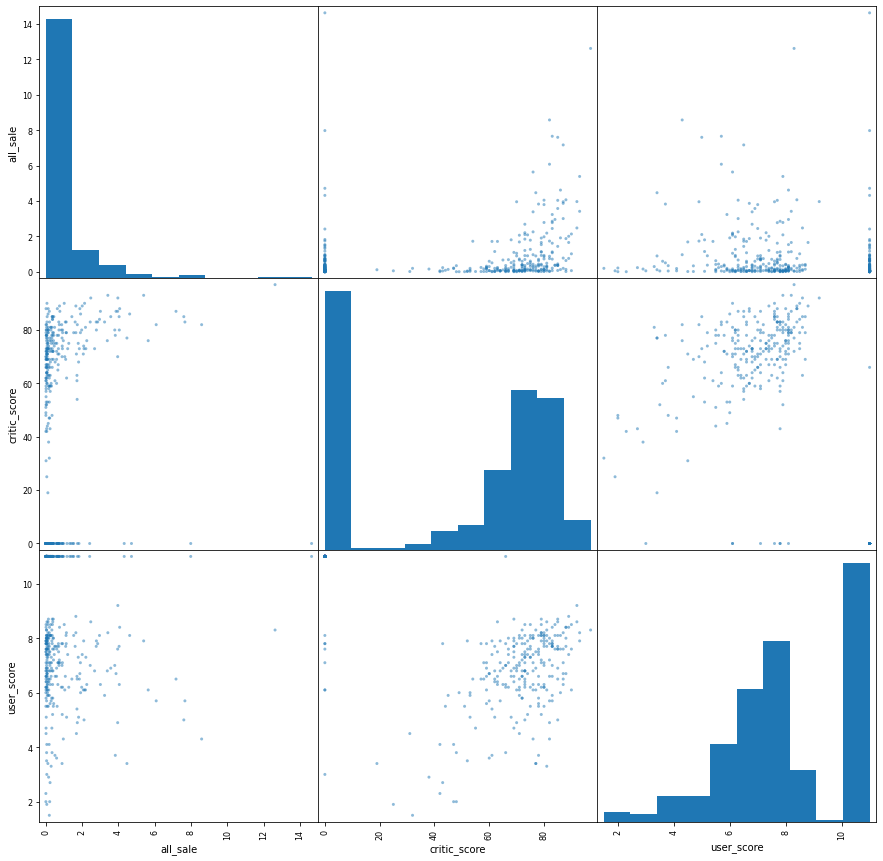

In [52]:

pd.plotting.scatter_matrix(PS4_salesratings, figsize=(15, 15))

In [53]:

XOne_salesratings = XOne_actual_data.loc[:,['all_sale', 'critic_score', 'user_score']]
XOne_salesratings.head()

,all_sale,critic_score,user_score
99,7.39,0,11.0
165,5.47,97,7.9
179,5.26,81,5.4
242,4.49,84,6.4
270,4.22,88,6.2


In [54]:
XOne_salesratings.corr()

,all_sale,critic_score,user_score
all_sale,1.000000,0.260269,-0.127202
critic_score,0.260269,1.000000,-0.573609
user_score,-0.127202,-0.573609,1.000000


array([[<AxesSubplot:xlabel='all_sale', ylabel='all_sale'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sale'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sale'>],
       [<AxesSubplot:xlabel='all_sale', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sale', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

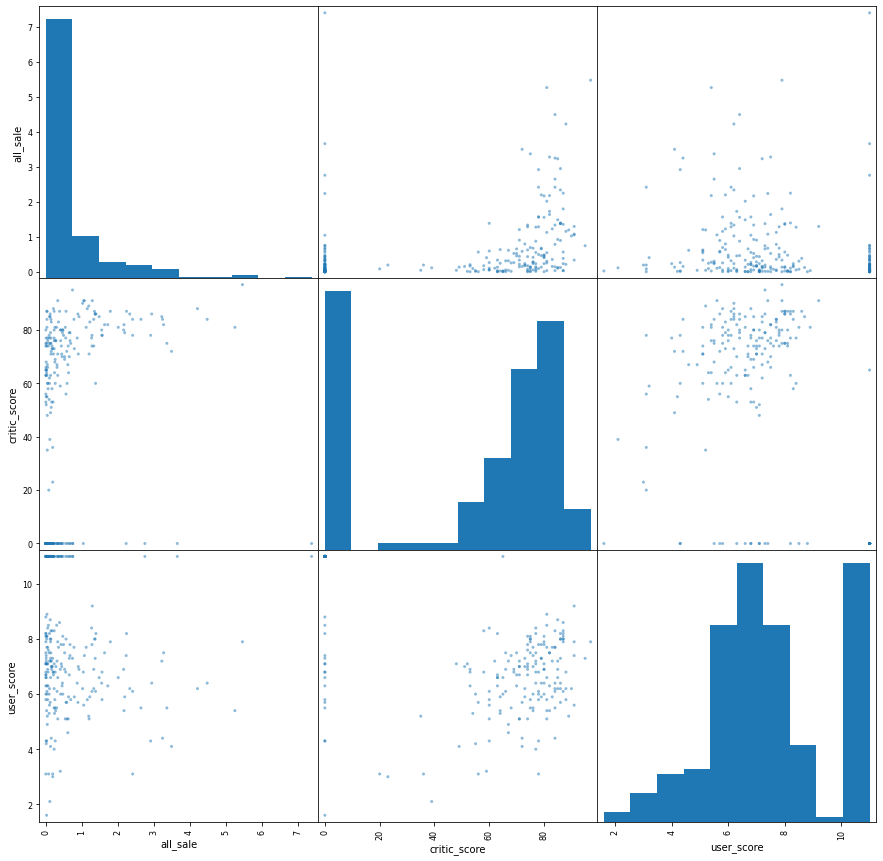

In [55]:
pd.plotting.scatter_matrix(XOne_salesratings, figsize=(15, 15))

In [56]:
_3DS_salesratings = _3DS_actual_data.loc[:,['all_sale', 'critic_score', 'user_score']]
_3DS_salesratings.head()

,all_sale,critic_score,user_score
33,14.60,0,11.0
47,11.68,0,11.0
96,7.55,0,11.0
108,7.14,0,11.0
184,5.22,0,11.0


In [57]:
_3DS_salesratings.corr()

,all_sale,critic_score,user_score
all_sale,1.000000,0.056114,0.019056
critic_score,0.056114,1.000000,-0.678512
user_score,0.019056,-0.678512,1.000000


array([[<AxesSubplot:xlabel='all_sale', ylabel='all_sale'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sale'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sale'>],
       [<AxesSubplot:xlabel='all_sale', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sale', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

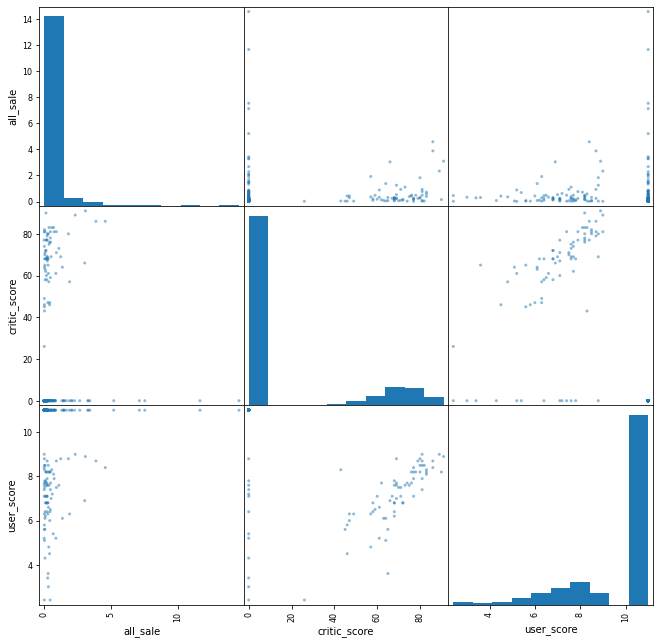

In [58]:
pd.plotting.scatter_matrix(_3DS_salesratings, figsize=(11, 11))

In [59]:
m=actual_data[actual_data['user_score']!=0]['user_score']
m.describe()

count    2129.000000
mean        8.521981
std         2.501040
min         0.200000
25%         6.800000
50%         8.300000
75%        11.000000
max        11.000000
Name: user_score, dtype: float64

In [118]:
cc=actual_data[actual_data['critic_score']!=0]['critic_score']
cc=actual_data[actual_data['user_score']!=11]['user_score']
cc.describe()

count    1195.000000
mean        6.585188
std         1.609521
min         0.200000
25%         5.800000
50%         7.000000
75%         7.800000
max         9.300000
Name: user_score, dtype: float64

In [125]:
actual_data1=actual_data.query('user_score!=11')

In [126]:
actual_data1=actual_data.query('critic_score!=0')

In [129]:
actual_data1['all_sale'].corr(actual_data1['user_score'])

-0.003964283943166548

In [130]:
actual_data1['all_sale'].corr(actual_data1['critic_score'])

0.3112300594212853

Итак, в целом, слабая корреляция между рейтингом и продажами.У платформы PS4 слабая зависимость от отзывов пользователей - 0, 1, критиков - 0,22. У платформы XOne сильная зависимость от отзывов пользователей - 0,8 (положительная сильная), от критиков- 0,22( слабая). У платформы 3DS слабая корреляция от отзывов пользователей (0,3), от критиков умеренная( 0,6).

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим таблицу анализа жанров

In [63]:
genre_pivot_table = pd.pivot_table(actual_data, index='genre', values='all_sale', aggfunc='sum')
genre_pivot_table.sort_values('all_sale', ascending=False)

,all_sale
genre,
Action,318.63
Shooter,232.69
Sports,150.21
Role-Playing,145.89
Misc,61.26
Platform,41.82
Racing,39.64
Fighting,35.23
Adventure,22.76


<AxesSubplot:ylabel='all_sale'>

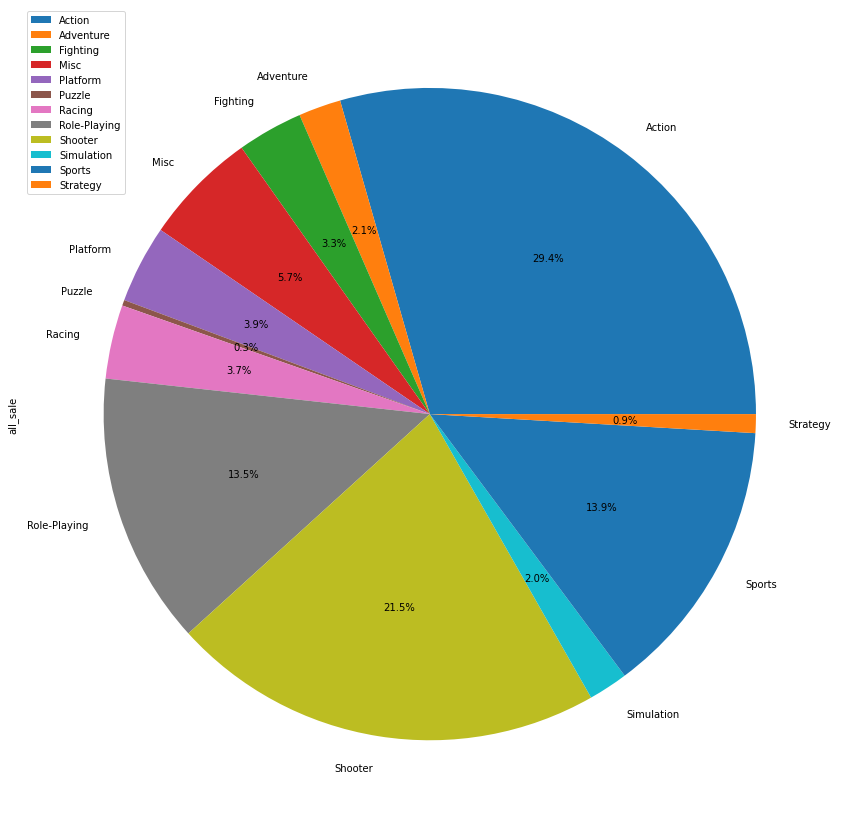

In [131]:
genre_pivot_table.plot(y="all_sale", kind="pie", figsize=(15, 15), autopct='%1.1f%%')
# Рисую круговую диаграмму распределения Жанров по прибыльности


Самые прибыльные жанры - экшэн(Action), шутеры (Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).
Самые низкие продажи у Simulation, Strategy и Puzzle. Это обусловлено тем, что и вложения, затраченные на производство таких игр невысокие.

Посмотрим медианы.

In [65]:
genre_pivot_table2= pd.pivot_table(actual_data, index='genre', values='all_sale', aggfunc='median')
genre_pivot_table2.sort_values('all_sale', ascending=False)

,all_sale
genre,
Shooter,0.505
Sports,0.290
Platform,0.250
Fighting,0.130
Racing,0.125
Role-Playing,0.125
Action,0.110
Misc,0.110
Simulation,0.100


<AxesSubplot:ylabel='all_sale'>

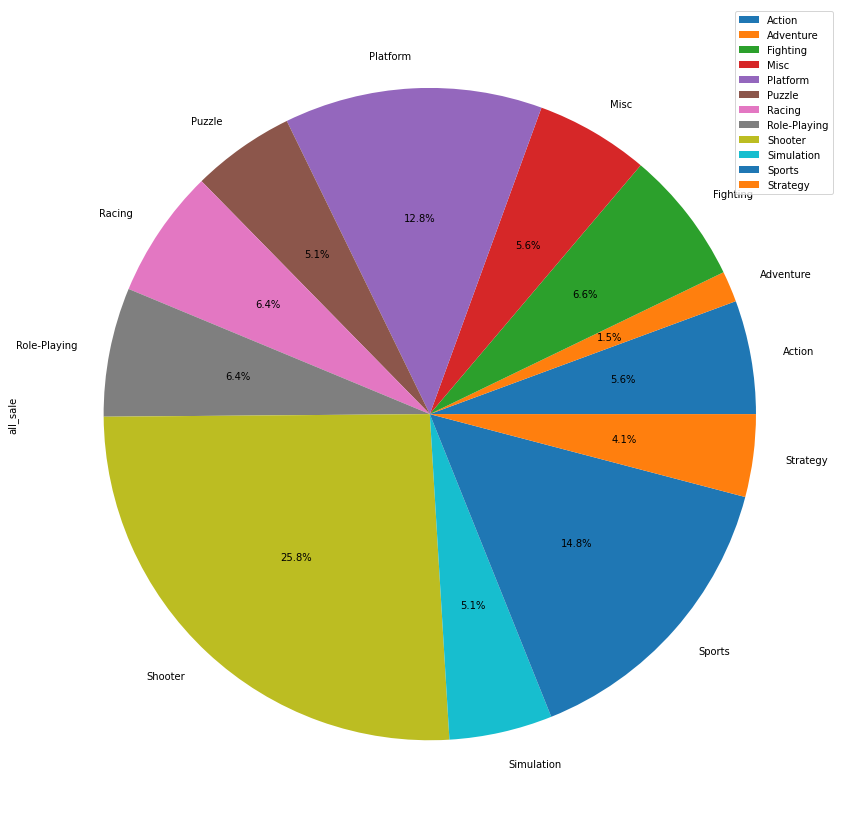

In [132]:
genre_pivot_table2.plot(y="all_sale", kind="pie", figsize=(15, 15), autopct='%1.1f%%')

Наиболее популярные жанры Shooter, Sports, Role-Playing, Fighting. Видимо одни бестселлеры в определенных жанрах оказали большое влияние на статистику продаж.

#### Шаг 4. Составьте портрет пользователя каждого региона

In [67]:
na_actual_data = actual_data.query('na_sales > 0')
na_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 16 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1254 non-null   object 
 1   platform         1254 non-null   object 
 2   year_of_release  1254 non-null   int64  
 3   genre            1254 non-null   object 
 4   na_sales         1254 non-null   float64
 5   eu_sales         1254 non-null   float64
 6   jp_sales         1254 non-null   float64
 7   other_sales      1254 non-null   float64
 8   critic_score     1254 non-null   int64  
 9   user_score       1254 non-null   float32
 10  rating           958 non-null    object 
 11  all_sale         1254 non-null   float64
dtypes: float32(1), float64(5), int64(2), object(4)
memory usage: 122.5+ KB


In [68]:
eu_actual_data= actual_data.query('eu_sales > 0')
eu_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1346 non-null   object 
 1   platform         1346 non-null   object 
 2   year_of_release  1346 non-null   int64  
 3   genre            1346 non-null   object 
 4   na_sales         1346 non-null   float64
 5   eu_sales         1346 non-null   float64
 6   jp_sales         1346 non-null   float64
 7   other_sales      1346 non-null   float64
 8   critic_score     1346 non-null   int64  
 9   user_score       1346 non-null   float32
 10  rating           1021 non-null   object 
 11  all_sale         1346 non-null   float64
dtypes: float32(1), float64(5), int64(2), object(4)
memory usage: 131.4+ KB


In [69]:
jp_actual_data = actual_data.query('jp_sales > 0')
jp_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1175 non-null   object 
 1   platform         1175 non-null   object 
 2   year_of_release  1175 non-null   int64  
 3   genre            1175 non-null   object 
 4   na_sales         1175 non-null   float64
 5   eu_sales         1175 non-null   float64
 6   jp_sales         1175 non-null   float64
 7   other_sales      1175 non-null   float64
 8   critic_score     1175 non-null   int64  
 9   user_score       1175 non-null   float32
 10  rating           462 non-null    object 
 11  all_sale         1175 non-null   float64
dtypes: float32(1), float64(5), int64(2), object(4)
memory usage: 114.7+ KB


In [70]:
na_platform = pd.pivot_table(na_actual_data, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform

,na_sales
platform,
PS4,108.62
XOne,92.77
X360,80.90
PS3,63.27
3DS,37.71
WiiU,29.01
PC,11.19
Wii,5.46
PSV,5.03


<AxesSubplot:ylabel='name'>

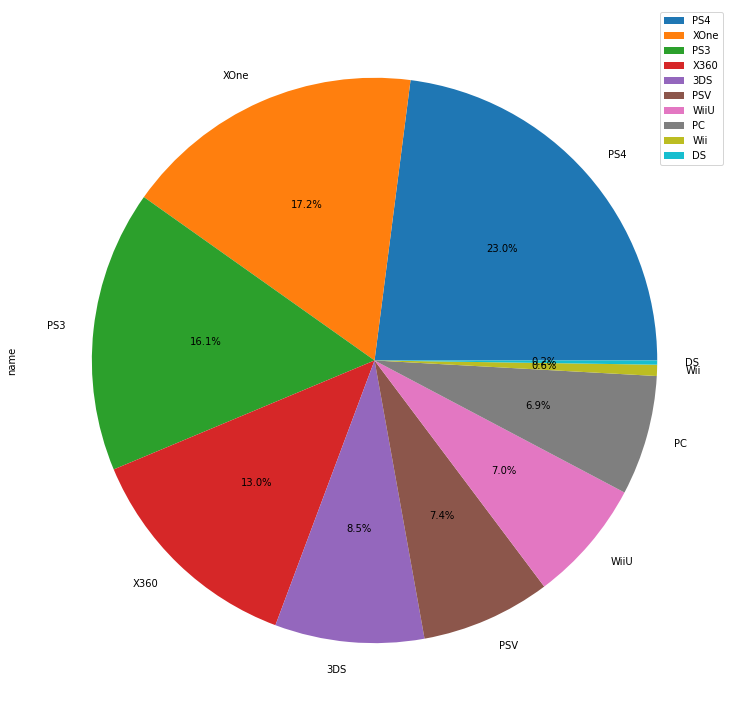

In [71]:
(
    na_actual_data
    .pivot_table(index="platform", values="name", aggfunc="count")
    .sort_values('name', ascending=False)
    .plot(y="name", kind="pie", figsize=(13, 13), autopct='%1.1f%%')
)

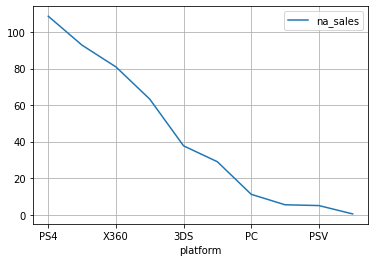

In [72]:
na_platform.plot(grid=True)
plt.show()

In [73]:
eu_platform = pd.pivot_table(eu_actual_data, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform

,eu_sales
platform,
PS4,141.09
PS3,67.23
XOne,51.43
X360,42.04
3DS,30.11
PC,25.75
WiiU,19.69
PSV,5.95
Wii,4.46


In [74]:
jp_platform= pd.pivot_table(jp_actual_data, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform

,jp_sales
platform,
3DS,67.70
PS3,22.98
PSV,18.48
PS4,15.96
WiiU,10.88
PSP,3.53
X360,0.50
XOne,0.34
Wii,0.05


Платформы ,популярные в Америке: PS4, XOne, X360.
Платформы ,популярные в Европе: PS4, PS3,XOne.
Платформы ,популярные в Японии: 3DS,PS3,PSV.

In [75]:
na_genre = pd.pivot_table(na_actual_data, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre
na_genre

,na_sales
genre,
Action,124.74
Shooter,109.61
Sports,65.17
Role-Playing,46.40
Misc,26.64
Platform,17.91
Fighting,15.53
Racing,12.87
Adventure,6.86


In [76]:
eu_genre = pd.pivot_table(eu_actual_data, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre

,eu_sales
genre,
Action,116.92
Shooter,87.72
Sports,60.22
Role-Playing,36.97
Racing,20.09
Misc,19.24
Platform,15.08
Simulation,10.68
Fighting,8.53


In [77]:

jp_genre= pd.pivot_table(jp_actual_data, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.02
Misc,9.44
Fighting,7.62
Shooter,6.60
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.46


In [136]:
stat_2016 = actual_data\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','all_sale'], ['platform'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)
stat_2016

,all_sale,eu_sales,jp_sales,na_sales,other_sales
platform,,,,,
PS4,244.92,112.78,9.45,84.66,38.03
XOne,134.26,43.34,0.29,78.61,12.02
X360,116.20,36.19,0.43,69.29,10.29
PS3,152.15,59.19,14.32,55.29,23.35
WiiU,52.36,16.64,8.36,23.54,3.82
3DS,43.25,11.49,14.25,15.08,2.43
PC,35.69,22.64,0.00,10.29,2.76
Wii,10.54,4.22,0.00,5.43,0.89
PSV,17.28,4.48,6.61,3.75,2.44


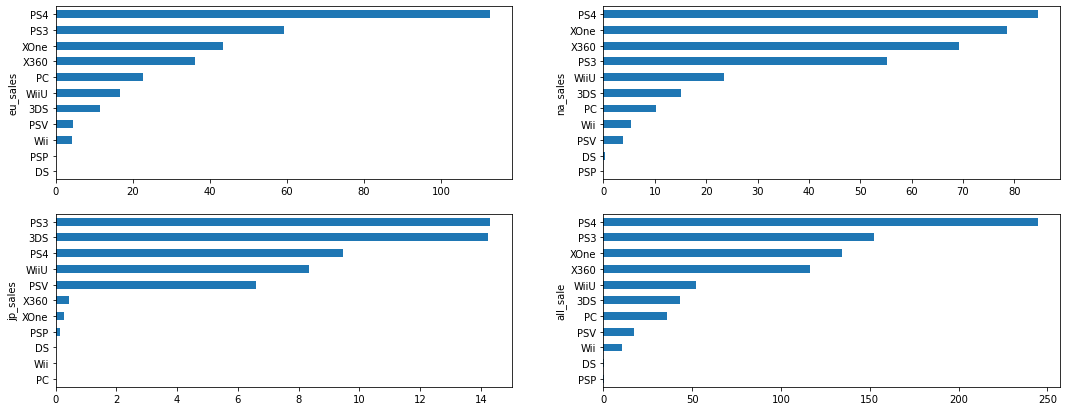

In [137]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

stat_2016['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0]).set(ylabel='eu_sales');
stat_2016['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1]).set(ylabel='na_sales');
stat_2016['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0]).set(ylabel='jp_sales');
stat_2016['all_sale'].sort_values(ascending=True).plot.barh(ax=axis[1,1]).set(ylabel='all_sale');

#.set(title = '', xlabel = 'Показатели', ylabel = 'Числовые значения')

[Text(0, 0.5, 'all_sale')]

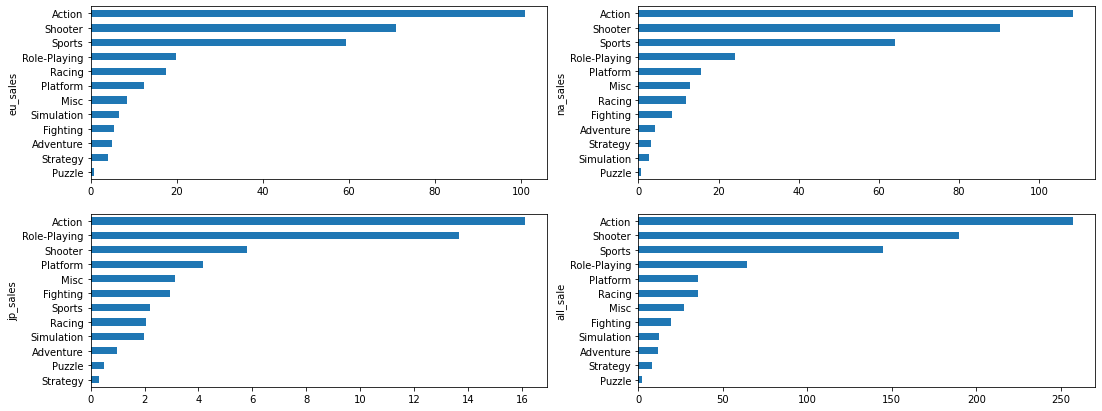

In [135]:
stat_2016_g = actual_data\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','all_sale'], ['genre'], aggfunc='sum')

fig, axis = plt.subplots(2,2, figsize=(18,7))

stat_2016_g['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0]).set(ylabel='eu_sales');
stat_2016_g['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1]).set(ylabel='na_sales');
stat_2016_g['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0]).set(ylabel='jp_sales');
stat_2016_g['all_sale'].sort_values(ascending=True).plot.barh(ax=axis[1,1]).set(ylabel='all_sale')

Самые популярные жанры в Америке:Action	,Shooter, Sports.
Самые популярные жанры в Европе:Action	,Shooter, Sports.
Самые популярные жанры в Японии:Role-Playing,Action,Misc.

In [81]:
na_rating = pd.pivot_table(na_actual_data, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,165.23
E,78.24
E10+,51.97
T,49.60


In [82]:
eu_rating = pd.pivot_table(eu_actual_data, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,145.78
E,82.03
T,41.81
E10+,40.03


In [83]:
jp_rating = pd.pivot_table(jp_actual_data, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
T,20.12
E,15.14
M,14.11
E10+,5.76


Ситуация в Америке и Европе одинаковая, в Яппонии отличается: там популярны игры с рейтингом T.

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

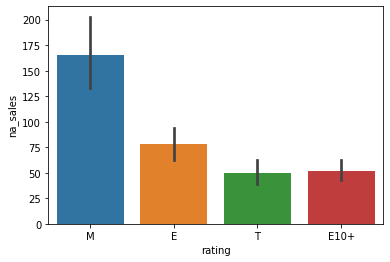

In [84]:
sns.barplot(y='na_sales', x='rating', data = actual_data,estimator=sum)

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

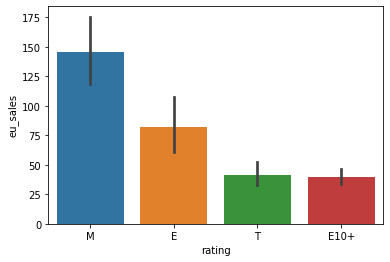

In [85]:
sns.barplot(y='eu_sales', x='rating', data = actual_data,estimator=sum)

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

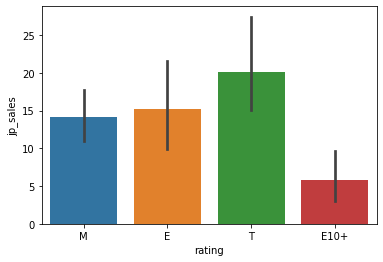

In [86]:
sns.barplot(y='jp_sales', x='rating', data = actual_data,estimator=sum)

<AxesSubplot:xlabel='rating', ylabel='all_sale'>

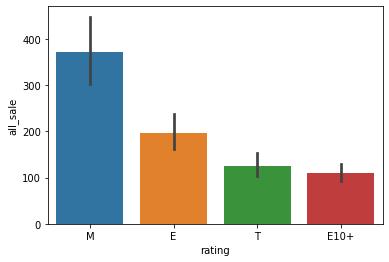

In [87]:
sns.barplot(y='all_sale', x='rating', data = actual_data,estimator=sum)

Платформы ,популярные в Америке: PS4, XOne, 3DS.
Платформы ,популярные в Европе: PS4, XOne,3DS. Ситация в Японии отличается: 3DS,PS3,PSV. XOne не популярен.



Самые популярные жанры в Америке:Action ,Shooter, Sports. Самые популярные жанры в Европе:Action ,Shooter, Sports. Самые популярные жанры в Японии:Role-Playing,Action,Misc.

Ситуация в Америке и Европе одинаковая, в Яппонии отличается: там популярны игры с рейтингом T.

Проверьте гипотезы (Шаг 5.)
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различны.

In [138]:

r_xone = data.query('platform =="XOne" and user_score!=11 and year_of_release >= 2012')['user_score']

r_pc = data.query('platform =="PC" and user_score!=11  and year_of_release >= 2012')['user_score']

# выборка из 200 оценок пользователей 
r_xone = list(r_xone)
r_pc = list(r_pc)


In [139]:
from scipy import stats as st

sample_1 =  r_xone
sample_2 =r_pc

alpha = 0.05# уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6252774683909849
Не получилось отвергнуть нулевую гипотезу


Вывод: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [90]:
r_action = data.query('genre =="Action" and user_score >0 and year_of_release >= 2012')['user_score']
r_sports = data.query('genre =="Sports" and user_score >0 and year_of_release >= 2012')['user_score']
sample_1 = r_action.tolist()
sample_2 = r_sports.tolist()

In [91]:
alpha = 0.05# уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.0405504600232623e-33
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Итоговый вывод

В ходе проделанной работы:

Просмотрена таблица, выявлены аномалии и пропущенные значения.
Проведена предобработка данных: заполнили пропуски, удалили пропуски, создали новый столбец и т.д.
Проведен исследоват. анализ по данным и подготовлены актуальные данные.
Составлены портреты пользователей для купных регионов продаж.
Выполнены проверки гипотез.


Было выявлено, что между отзывами пользователей и критиков и продажами игр сильной связи нет. Корреляция 0,8 была замечена только у платформы XOne и оценками пользователей.

Самыми популярными жанрами стали Экшен (Action), 285.23 млн, шутеры (Shooter),	204.21 млн, ролевые игры (Role-Playing),134.41 млн и спорт (Sports)	131.20 млн. Наименее прибыльные жанры : Стратегия (Strategy),9.27 млн и Пазл (Puzzle), 3.01 млн.
Платформы ,популярные в Америке: PS4, XOne, X360. Платформы ,в Европе: PS4, PS3,XOne.,в Японии: 3DS,PS3,PSV. Как видим, PS4, XOne популярны как в Америке, так и в Европе. В Японии ситуация немного отличается. В Евопе и Америке популярные жанры Экшен (Action), шутеры (Shooter) и Спорт(Sports), однако японские пользователи выбирают ролевые игры (Role-Playing) как самый популярный жанр, Action как 2 и Misc на 3 месте.


В итоге были выдвинуты гипотезы. Первая нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различны. Использовав метод skipy.stats.ttest_rel мы не смогли отвергнуть нулевую гипотезу и пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.


Вторая нулевая гипотеза:  редние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые,альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. С помощью метода skipy.stats.ttest_rel нулевая гипотеза была отвергнута, вывод: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Рекомендации для компании на 2017 год: делать игры для современных популярных платформ: Покупать вышедшие и новые игры на PS4, PD3, XOne и 3DS, в популярных жанрах :экшен, шутеры, спортивные игры и ролевые игры. Рейтинг наиболее популярных игр: 17 лет и старше.